# Create datasets and classifiers

This notebook can be used to create new diamond datasets, new datasets for training the svm, and also for training the svm. It also has code for creating the background spins used in the last step of the code.

In [2]:
%load_ext autoreload
%autoreload 1
import numpy as np
import matplotlib.pyplot as plt
import time
#import qutip as qt
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
%aimport analysis
%aimport learning
%aimport NV_generator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
logdirs = ['/Users/juan/Google Drive/Zia Lab/Log/']
for i in range(len(logdirs)):
	print(str(i)+'. '+logdirs[i])
print(str(len(logdirs))+'. '+'other')
choicedir = int(input('Choose: '))
if choicedir == len(logdirs):
    while True:
        logdir = input('Enter path:')
        if os.path.isdir(logdir):
            break
        print('Directory does not exist in this computer. Please enter a valid one.')
else:
	logdir = logdirs[choicedir]
if not(os.path.isdir(logdir)):
    print('Directory does not exist in this computer')
	
def loggraph():
	"""Save a graph to the log in Google Drive in both png and pdf formats."""
	timestamp = int(time.time())
	pngfigname = logdir+'graphs/plot'+str(timestamp)+'.png'
	pdffigname = logdir+'graphs/plot'+str(timestamp)+'.pdf'
	print(pngfigname)
	print(pdffigname)
	plt.savefig(pngfigname, dpi=300)
	plt.savefig(pdffigname)
def logdata(description, data):
	"""Save data to a pickle located in the Google Drive log."""
	timestamp = int(time.time())
	picklename = logdir+'data/data'+str(timestamp)+'.pickle'
	pickle.dump([description, data], open(picklename,'wb'))
	print('File saved succesfully to '+picklename+'.')

0. /Users/juan/Google Drive/Zia Lab/Log/
1. other
Choose: 0


In [4]:
B_field = 0.0403555 # Teslas
gam_c = 67.262 * 10 ** 6 # Gyromagnetic ratio for a single c13 nucleus in rad s-1 T-1
ms = 1
omega_larmor = -1 * ms * gam_c * B_field

In [5]:
num_diamonds = 29

In [7]:
if True: # In here one would create new diamond datasets.
    learning.create_diamonds(range(num_diamonds, 2 * num_diamonds), omega_larmor, num_spins = 450)

diamond_num:  29
number of dips:  1031
dii:  0
dii:  1
dii:  2
dii:  3
dii:  4
dii:  5
dii:  6
dii:  7
dii:  8
dii:  9
dii:  10
dii:  11
dii:  12
dii:  13
dii:  14
dii:  15
dii:  16
dii:  17
dii:  18
dii:  19
dii:  20
dii:  21
dii:  22
dii:  23
dii:  24
dii:  25
dii:  26
dii:  27
dii:  28
dii:  29
dii:  30
dii:  31
dii:  32
dii:  33
dii:  34
dii:  35
dii:  36
dii:  37
dii:  38
dii:  39
dii:  40
dii:  41
dii:  42
dii:  43


KeyboardInterrupt: 

In [6]:
diamonds = [] # This over here imports the diamond datasets.
for diamond_num in range(num_diamonds):
    print "loading diamond ", diamond_num
    diamond = learning.load_obj("diamonds/diamond_" + str(diamond_num))
    diamonds.append(diamond)
print "diamonds loaded"
suffix = "_di3220_29diamonds_cxABe"
if False:
    _ = learning.guess_dataset(diamonds, omega_larmor, pickle = True, training_percent = .5, min_dip_ind = 3220, suffix = suffix)

loading diamond  0
loading diamond  1
loading diamond  2
loading diamond  3
loading diamond  4
loading diamond  5
loading diamond  6
loading diamond  7
loading diamond  8
loading diamond  9
loading diamond  10
loading diamond  11
loading diamond  12
loading diamond  13
loading diamond  14
loading diamond  15
loading diamond  16
loading diamond  17
loading diamond  18
loading diamond  19
loading diamond  20
loading diamond  21
loading diamond  22
loading diamond  23
loading diamond  24
loading diamond  25
loading diamond  26
loading diamond  27
loading diamond  28
diamonds loaded


In [ ]:
plt.figure()
plt.plot(diamonds[0]['A'],diamonds[0]['B'])
plt.show()

In [ ]:
len(diamonds[0]['A'])

In [14]:
diamonds[0].keys()

['A',
 'tau',
 'B',
 'successful_fits',
 'windows',
 'data',
 'N_data',
 'error_tol',
 'N',
 'N_vals',
 'num_subsets',
 'xs_list',
 'costheta',
 'scaled_errors',
 'phis_list',
 'r',
 'dip_inds',
 'sintheta',
 'good_fits']

In [13]:
# In here the classifier is trained
suffix = "_di3220_29diamonds_cxABe"
dataset = learning.load_obj("datasets/guess_dataset" + suffix)
if True:
    print "train svm"
    scaler, clf = learning.train_svm(dataset["train_X"], dataset["train_Y"], dataset["test_X"], dataset["test_Y"],
                                 kernel='linear', verbose = True, pickle = False, suffix = suffix)

train svm
training score:  0.913136857177
testing score:  0.909582799373


In [81]:
xtrain=np.array(dataset["train_X"])
ytrain=np.array(dataset["train_Y"])
xtest = np.array(dataset["test_X"])
ytest = np.array(dataset["test_Y"])
np.savetxt('datasets/guess_dataset_xtrain.csv',xtrain,delimiter=',')
np.savetxt('datasets/guess_dataset_ytrain.csv',ytrain,delimiter=',')
np.savetxt('datasets/guess_dataset_xtest.csv',xtest,delimiter=',')
np.savetxt('datasets/guess_dataset_ytest.csv',ytest,delimiter=',')

In [85]:
# Let's change the feature vector and see what happens
# Keep only A and B
xtrain=np.array(dataset["train_X"])
ytrain=np.array(dataset["train_Y"])
xtest = np.array(dataset["test_X"])
ytest = np.array(dataset["test_Y"])
xtrain[:,0]=0
xtrain[:,1]=0
xtrain[:,4]=0
xtest[:,0]=0
xtest[:,1]=0
xtest[:,4]=0
suffix = "_di3220_29diamonds_cxABe"
dataset = learning.load_obj("datasets/guess_dataset" + suffix)
if True:
    print "train svm"
    scaler, clf = learning.train_svm(xtrain, ytrain, xtest, ytest,
                                 kernel='linear', verbose = True, pickle = False, suffix = suffix)

train svm
training score:  0.830688461997
testing score:  0.83525558878


In [86]:
# Let's change the feature vector and see what happens
# Keep only cosphi, A, and B
xtrain=np.array(dataset["train_X"])
ytrain=np.array(dataset["train_Y"])
xtest = np.array(dataset["test_X"])
ytest = np.array(dataset["test_Y"])
xtrain[:,1]=0
xtrain[:,4]=0
xtest[:,1]=0
xtest[:,4]=0
suffix = "_di3220_29diamonds_cxABe"
dataset = learning.load_obj("datasets/guess_dataset" + suffix)
if True:
    print "train svm"
    scaler, clf = learning.train_svm(xtrain, ytrain, xtest, ytest,
                                 kernel='linear', verbose = True, pickle = False, suffix = suffix)

train svm
training score:  0.846557690013
testing score:  0.849779296597


In [87]:
# Let's change the feature vector and see what happens
# Keep only A, B, and epsilon
xtrain=np.array(dataset["train_X"])
ytrain=np.array(dataset["train_Y"])
xtest = np.array(dataset["test_X"])
ytest = np.array(dataset["test_Y"])
xtrain[:,0]=0
xtrain[:,1]=0
xtest[:,0]=0
xtest[:,1]=0
suffix = "_di3220_29diamonds_cxABe"
dataset = learning.load_obj("datasets/guess_dataset" + suffix)
if True:
    print "train svm"
    scaler, clf = learning.train_svm(xtrain, ytrain, xtest, ytest,
                                 kernel='linear', verbose = True, pickle = False, suffix = suffix)

train svm
training score:  0.830688461997
testing score:  0.83525558878


In [113]:
xtrain=np.array(dataset["train_X"])
ytrain=np.array(dataset["train_Y"])
xtest = np.array(dataset["test_X"])
ytest = np.array(dataset["test_Y"])
np.savetxt('datasets/guess_dataset_xtrain.csv',xtrain,delimiter=',')
np.savetxt('datasets/guess_dataset_ytrain.csv',ytrain,delimiter=',')
np.savetxt('datasets/guess_dataset_xtest.csv',xtest,delimiter=',')
np.savetxt('datasets/guess_dataset_ytest.csv',ytest,delimiter=',')

/Users/juan/Google Drive/Zia Lab/Log/graphs/plot1493764122.png
/Users/juan/Google Drive/Zia Lab/Log/graphs/plot1493764122.pdf


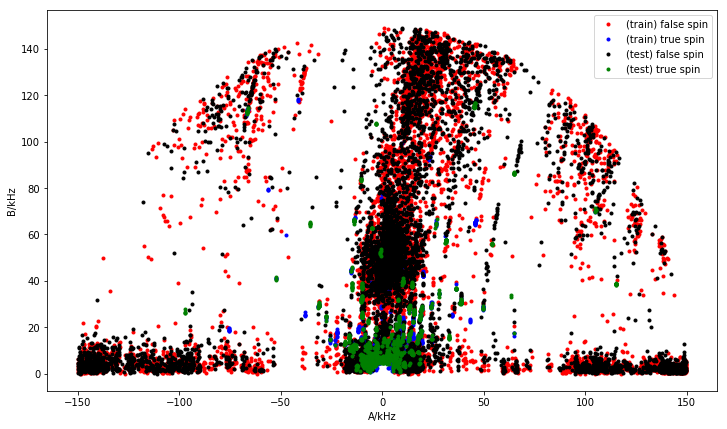

In [114]:
plt.figure(figsize=(12,7))
plt.plot(1./2/np.pi*10**(-3)*xtrain[:,2][ytrain==0],1./2/np.pi*10**(-3)*xtrain[:,3][ytrain==0],'ro',label='(train) false spin',ms=3)
plt.plot(1./2/np.pi*10**(-3)*xtrain[:,2][ytrain==1],1./2/np.pi*10**(-3)*xtrain[:,3][ytrain==1],'bo',label='(train) true spin',ms=3)
plt.plot(1./2/np.pi*10**(-3)*xtest[:,2][ytest==0],1./2/np.pi*10**(-3)*xtest[:,3][ytest==0],'ko',label='(test) false spin',ms=3)
plt.plot(1./2/np.pi*10**(-3)*xtest[:,2][ytest==1],1./2/np.pi*10**(-3)*xtest[:,3][ytest==1],'go',label='(test) true spin',ms=3)
plt.legend()
plt.xlabel('A/kHz')
plt.ylabel('B/kHz')
#loggraph()
plt.show()

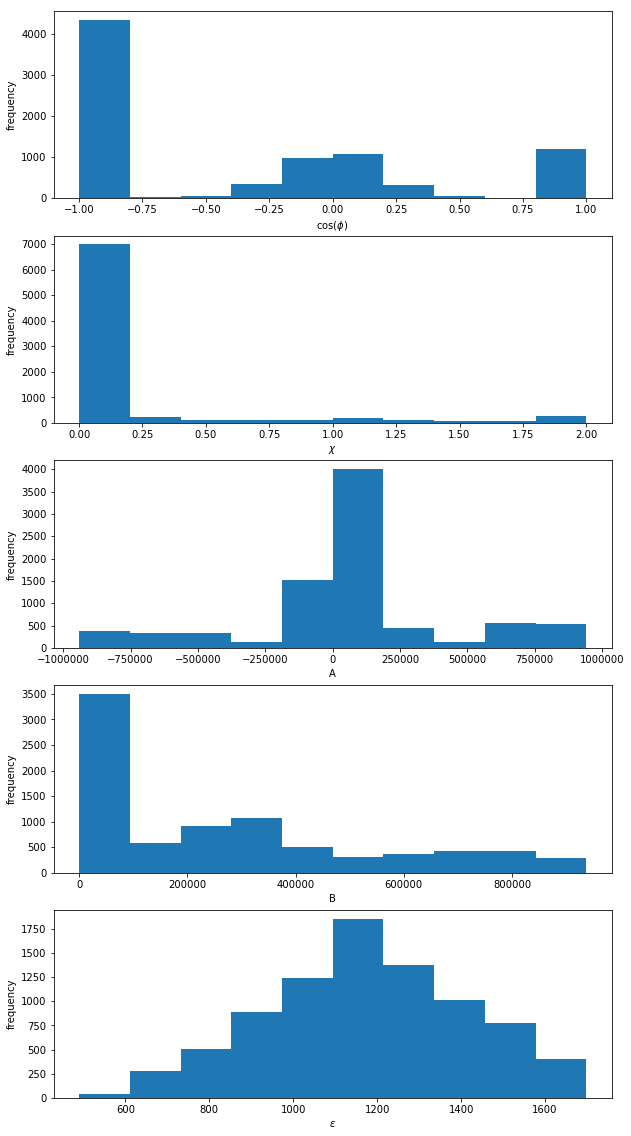

In [128]:
things = ['cos($\phi$)','$\chi$','A','B','$\epsilon$']
plt.figure(figsize=(10,20))
for i in range(len(things)):
    plt.subplot(5,1,i+1)
    plt.hist(xtrain[:,i])
    plt.xlabel(things[i])
    plt.ylabel('frequency')
plt.show()

In [6]:
?learning.train_svm

In [11]:
dataset['train_X'][0]

[-0.15481669058433273,
 0.079259725304179046,
 52676.271155967843,
 427068.83987141855,
 942.346642474742]

In [7]:
clf.coef_, clf.intercept_

(array([[-0.36175828,  0.95493479,  0.00244094,  0.03401229, -0.02430468]]),
 array([-0.94027893]))

In [26]:
A_background = 4 * analysis.mag * (np.random.rand(400) - .5)
B_background = 2 * analysis.mag * (np.random.rand(400))
background_dict = {"A_background" : A_background, "B_background" : B_background}
if False:
    learning.store_obj(background_dict, "background_A_B")

## Stuff

In [8]:
len(diamonds)

NameError: name 'diamonds' is not defined

In [ ]:
# %load learning.py
# NV-spin-tomography Michael Scheer mgscheer@gmail.com

# Creating datasets and training classifiers, storing objects on disk

import numpy as np
import sklearn as sk
from sklearn import svm, preprocessing, cross_validation, cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.externals import joblib
import analysis
import NV_generator

# store an object in a file
def store_obj(obj, fname):
	joblib.dump(obj, fname + ".pkl")

# load an object from a file
def load_obj(fname):
	return joblib.load(fname + ".pkl")

# decides if a fitted A and B are close enough to a spin to be counted as a fit.
# the B tends to be harder to fit so the accuracy demanded is less.
def is_fit(fitted_A, fitted_B, spin, A_acc = .1, B_acc = .5):
	A_acc = analysis.mag * A_acc
	B_acc= analysis.mag * B_acc
	return ((spin[0] >= fitted_A - A_acc) and (spin[0] <= fitted_A + A_acc) and
		(spin[1] >= fitted_B - B_acc) and (spin[1] <= fitted_B + B_acc))

# creates a dataset of diamonds with N measurements already analyzed, saves it to disk
def create_diamonds(diamond_num_list, omega_larmor, num_spins = 450):
	verbose, plots = False, False
	num_subsets = 4
	error_fun = analysis.squared_error
	error_tol = .1/64
	N = 64
	N_vals = np.arange(0, 256, 2)
	tau = analysis.choose_tau_params(N)
	for diamond_num in diamond_num_list:
		print "diamond_num: ", diamond_num
		A, B, r, costheta, sintheta = NV_generator.generate_spins(num_spins)
		def data_func(N, tau, noise_level = .02):
			data = analysis.calc_M(A, B, N, omega_larmor, tau)
			noise = np.random.randn(len(data)) * noise_level
			return data + noise
		data = data_func(N, tau)
		dip_inds, windows = analysis.find_resonances(data, fit_dips_below = None)
		successful_fits, good_fits, phis_list, xs_list, scaled_errors = [], [], [], [], []
		print "number of dips: ", len(dip_inds)
		for dii in range(len(dip_inds)):
			print "dii: ", dii
			dip_ind = dip_inds[dii]
			res_tau = tau[dip_ind]
			N_data = data_func(N_vals, res_tau)
			successful_fit, good_fit = True, True # did the fit succeed without throwing an error? was the error in the fit small enough?
			try:
				phis, xs, scaled_error = analysis.repeated_spin_fit(N_vals, N_data, error_tol = error_tol, error_fun = error_fun,
					num_subsets = num_subsets, verbose = verbose, plots = plots)
				good_fit = scaled_error <= error_tol
			except analysis.FitError:
				successful_fit, good_fit = False, False
				phis, xs = None, None
				scaled_error = None
			successful_fits.append(successful_fit)
			good_fits.append(good_fit)
			phis_list.append(phis)
			xs_list.append(xs)
			scaled_errors.append(scaled_errors)
		print "create diamond_dict"
		diamond_dict = {"A" : A, "B" : B, "r" : r, "costheta" : costheta, "sintheta" : sintheta, "N" : N,
			"tau" : tau, "data" : data, "N_vals" : N_vals, "N_data" : N_data, "dip_inds" : dip_inds, "windows" : windows,
			"successful_fits" : successful_fits, "good_fits" : good_fits, "error_tol" : error_tol, "num_subsets" : num_subsets,
			"phis_list" : phis_list, "xs_list" : xs_list, "scaled_errors" : scaled_errors}
		print "store diamond_dict"
		store_obj(diamond_dict, "diamonds/diamond_" + str(diamond_num))

# train and optionally save a support vector machine classifier
# scaler preprocesses the data (scales it) and clf is the classifier
def train_svm(train_X, train_Y, test_X, test_Y, kernel = 'rbf', C=1.0, verbose = False, pickle = False, suffix = ""):
	scaler = sk.preprocessing.StandardScaler().fit(train_X)
	clf = sk.svm.SVC(kernel = kernel, C=C)# svm with rbf kernel (default)
	clf.fit(scaler.transform(train_X), train_Y)
	if verbose:
		print "training score: ", clf.score(scaler.transform(train_X), train_Y)
		print "testing score: ", clf.score(scaler.transform(test_X), test_Y)
	if pickle:
		store_obj(scaler, "classifiers/scaler_svm_" + kernel + suffix)
		store_obj(clf, "classifiers/clf_svm_" + kernel + suffix)
	return scaler, clf

# train and optionally save an extra-trees classifier
# scaler preprocesses the data (scales it) and clf is the classifier
def train_trees(train_X, train_Y, test_X, test_Y, verbose = False, pickle = False, suffix = ""):
	scaler = sk.preprocessing.StandardScaler().fit(train_X)
	clf = sk.ensemble.ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=1, random_state=0)
	clf.fit(scaler.transform(train_X), train_Y)
	if verbose:
		print "training score: ", clf.score(scaler.transform(train_X), train_Y)
		print "testing score: ", clf.score(scaler.transform(test_X), test_Y)
	if pickle:
		store_obj(scaler, "classifiers/scaler_trees" + suffix)
		store_obj(clf, "classifiers/clf_trees" + suffix)
	return scaler, clf

# creates and optionally saves the dataset used to train the SVM which classifies guesses.
def guess_dataset(diamonds, omega_larmor, min_dip_ind = 3220, training_percent = .75, pickle = False, suffix = ""):
	train_X = [] # feature vectors
	train_Y = [] # classifications
	test_X = []
	test_Y = []
	error_fun = analysis.squared_error
	for diamond_ind in range(len(diamonds)):
		print "diamond_ind: ", diamond_ind
		diamond = diamonds[diamond_ind]
		tau = diamond["tau"]
		data = diamond["data"]
		N = diamond["N"]
		dip_inds = diamond["dip_inds"]
		windows = diamond["windows"]
		spin_dict = {}
		for dii in range(len(dip_inds)):
			if diamond["good_fits"][dii] and dip_inds[dii] >= min_dip_ind:
				dip_ind = dip_inds[dii]
				res_tau = tau[dip_ind]
				for phi, x in zip(diamond["phis_list"][dii], diamond["xs_list"][dii]):
					for omega_tilde, cosphi in analysis.calc_omega_tilde(phi, x, res_tau, omega_larmor):
						A, B = analysis.calc_A_B(cosphi, res_tau, omega_larmor, omega_tilde)
						if analysis.valid_A_B(A, B):
							if (dip_ind, phi, x) in spin_dict:
								spin_dict[(dip_ind, phi, x)] += [(A, B, cosphi)]
							else:
								spin_dict[(dip_ind, phi, x)] = [(A, B, cosphi)]
		for k in spin_dict.keys():
			err = []
			for A, B, _ in spin_dict[k]:
				err.append(error_fun(analysis.calc_M_single(A, B, N, omega_larmor, tau), data))
			min_err_ind = np.argmin(err)
			best_A, best_B, best_cosphi = spin_dict[k][min_err_ind]
			best_err = err[min_err_ind]
			_, _, x = k
			features = [best_cosphi, x, best_A, best_B, best_err]
			tag = 0
			for spin in set(zip(diamond["A"], np.abs(diamond["B"]))):
				if is_fit(best_A, best_B, spin, A_acc = .5, B_acc = 2):
					tag = 1
					break
			if diamond_ind < training_percent * len(diamonds):
				train_X.append(features)
				train_Y.append(tag)
			else:
				test_X.append(features)
				test_Y.append(tag)
	if pickle:
		print "create dataset"
		dataset = {"train_X" : train_X, "train_Y" : train_Y, "test_X" : test_X, "test_Y" : test_Y}
		print "store dataset"
		store_obj(dataset, "datasets/guess_dataset" + suffix)
	return train_X, train_Y, test_X, test_Y